In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
from functions import *

2022-04-12 20:25:56.898716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-12 20:25:56.898737: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_unsw_normal = pd.read_csv('dataset/train/unsw_normal.csv')
df_bot_dos = pd.read_csv('dataset/train/bot_iot_dos.csv')
df_bot_ddos = pd.read_csv('dataset/train/bot_iot_ddos.csv')

In [3]:
#ddos = 8 lakh samples
#dos =  8 lakh samples
#normal = 80 thousand samples

In [4]:
data = data_chunks_creater(df_unsw_normal,df_bot_dos,df_bot_ddos)

In [5]:
class_names = ['DoS','Normal','DDoS']

In [6]:
# label  Class
# 0      DoS
# 1      Normal
# 2      DDoS

In [7]:
x_label_data,y_label_data = data_preprocessing(data)

In [8]:
x_label_data[0]

,spkts,dpkts,sbytes,dbytes,dur,proto
0,0.001451,0.001166,0.000265,0.000079,0.000009,0.0
1,0.005806,0.000000,0.002106,0.000000,0.282246,1.0
2,0.004354,0.000000,0.001652,0.000000,0.273068,1.0
3,0.002903,0.000583,0.000920,0.000027,0.086757,1.0
4,0.004354,0.001166,0.001097,0.000053,0.216803,1.0
...,...,...,...,...,...,...
239995,0.001451,0.001166,0.000218,0.000072,0.000009,0.0
239996,0.015965,0.010490,0.004495,0.004520,0.008857,1.0
239997,0.004354,0.000000,0.001652,0.000000,0.254246,1.0
239998,0.002903,0.000000,0.001197,0.000000,0.127913,1.0


In [9]:
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(16, 6, input_length=6),
    tf.keras.layers.LSTM(20,dropout=0.1,recurrent_dropout=0.3,activation='tanh', return_sequences=True),
    tf.keras.layers.LSTM(20,dropout=0.1,recurrent_dropout=0.3,activation='tanh'),
    tf.keras.layers.Dense(3, activation='softmax')
])

2022-04-12 20:26:10.775047: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-12 20:26:10.775080: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (suntop): /proc/driver/nvidia/version does not exist
2022-04-12 20:26:10.775501: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [12]:
model.fit(x_label_data[0], y_label_data[0],batch_size=128, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 1.0097 - accuracy: 0.4121
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9969 - accuracy: 0.4195
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9967 - accuracy: 0.4193
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9966 - accuracy: 0.4188
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9966 - accuracy: 0.4188
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9966 - accuracy: 0.4191
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9966 - accuracy: 0.4189
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9966 - accuracy: 0.4185
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.9966 - accuracy: 0.4191
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [13]:
predictions = model.predict(x_label_data[5])

In [14]:
y_pred = np.argmax(predictions, axis=-1)

accuracy:   0.419
Confusion matrix, without normalization


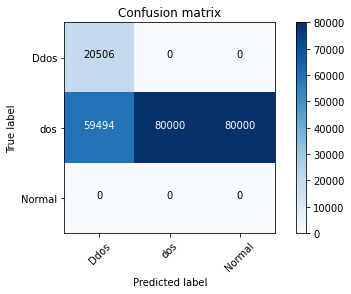

In [15]:
y_test = y_label_data[5]
score = metrics.accuracy_score(y_pred,y_test)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_pred,y_test)
plot_confusion_matrix(cm, classes=['Ddos', 'dos','Normal'])